## 10 Layers - 100 Neurons - 1 Year Data - Predicting 2 month

## Pre-requisites

In [1]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 
from statistics import mean
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import seaborn as sns


In [2]:
df = pd.DataFrame()
f = yf.download(tickers = "RELIANCE.NS",
                       start = '2022-01-01',
                       end = '2022-06-01',)

#df = f[[("Adj Close", s) for s in list_of_stocks]]
df = f[["Adj Close"]]
#df.columns = df.columns.droplevel(level=0)
# convert to numpy array
training_set = f.iloc[:,4:5].values
scaler = MinMaxScaler(feature_range = (0,1))
timestep = 15
training_set_scaled = scaler.fit_transform(training_set)
x_train_a = []
y_train_a = []
for i in range(timestep, len(training_set_scaled)):
    x_train_a.append(training_set_scaled[i-timestep: i, 0])
    y_train_a.append(training_set_scaled[i])

x_train_a, y_train_a = np.array(x_train_a), np.array(y_train_a)

[*********************100%***********************]  1 of 1 completed


In [3]:
df2 = pd.DataFrame()
f2 = yf.download(tickers = "RELIANCE.NS",
                       start = '2022-06-02',
                       end = '2022-09-03',)

#df = f[[("Adj Close", s) for s in list_of_stocks]]
df2 = f2[["Adj Close"]]
#df.columns = df.columns.droplevel(level=0)
test_set = f2.iloc[:,4:5].values
test_set_scaled = scaler.transform(test_set)
full_dataset = pd.concat((df, df2), axis = 0)
inputs = full_dataset[len(full_dataset) - len(test_set) - timestep:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(timestep, len(inputs)):
    x_test.append(inputs[i - timestep:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


## Training Model

## make model 
# instntiate model
my_model = Sequential()

# add layers 

#layer 1
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model.add(Dropout(rate = 0.2))

#layer 2
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))


#layer 3
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 4
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 5
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 6
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 7
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 8
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 9
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#layer 10
my_model.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#output layer 
my_model.add(Dense(units = 1))

## compile model 
my_model.compile(optimizer = "adam", loss = "mean_squared_error")

In [4]:
## make model 
# instntiate model
my_model = Sequential()

# add layers 

#layer 1
my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model.add(Dropout(rate = 0.2))

for i in range(8):
    #layer 2
    my_model.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu"))
    my_model.add(Dropout(rate = 0.2))

#layer 10
my_model.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model.add(Dropout(rate = 0.2))

#output layer 
my_model.add(Dense(units = 1))

## compile model 
my_model.compile(optimizer = "adam", loss = "mean_squared_error")

In [5]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15, 100)           10200     
                                                                 
 dropout (Dropout)           (None, 15, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15, 100)           20100     
                                                                 
 dropout_1 (Dropout)         (None, 15, 100)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 15, 100)           20100     
                                                                 
 dropout_2 (Dropout)         (None, 15, 100)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 15, 100)           2

In [6]:
numEpochs = 100
numBatch = 20
my_model.fit(x_train_a, y_train_a,  epochs = numEpochs, batch_size = numBatch)

Epoch 1/100
5/5 [==============================] - 10s 36ms/step - loss: 0.1563
Epoch 2/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1055
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1076
Epoch 4/100
5/5 [==============================] - 0s 32ms/step - loss: 0.1115
Epoch 5/100
5/5 [==============================] - 0s 30ms/step - loss: 0.0779
Epoch 6/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0689
Epoch 7/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0673
Epoch 8/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0532
Epoch 9/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0641
Epoch 10/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0511
Epoch 11/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0505
Epoch 12/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0522
Epoch 13/100
5/5 [==============================

#### Weights 

In [7]:
weights = []
for layer in my_model.layers:
    weights.append(layer.get_weights())


### Find MSE for every group of layers, hidden, using final weights from the trained model 

In [8]:
# MSE 
mse = []

#### 2 hidden layers 

In [9]:
my_model2 = Sequential()

# add layers 

#layer 1
my_model2.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model2.add(Dropout(rate = 0.2))

#layer 2
my_model2.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model2.add(Dropout(rate = 0.2))

#layer 3
my_model2.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model2.add(Dropout(rate = 0.2))

#output layer 
my_model2.add(Dense(units = 1))

## compile model 
my_model2.compile(optimizer = "adam", loss = "mean_squared_error")

In [10]:
my_model2.layers[0].set_weights(weights[0])
my_model2.layers[2].set_weights(weights[2])
my_model2.layers[4].set_weights(weights[4])
my_model2.layers[6].set_weights(weights[20])

In [11]:
predicted_stock_price = my_model2.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 8ms/step


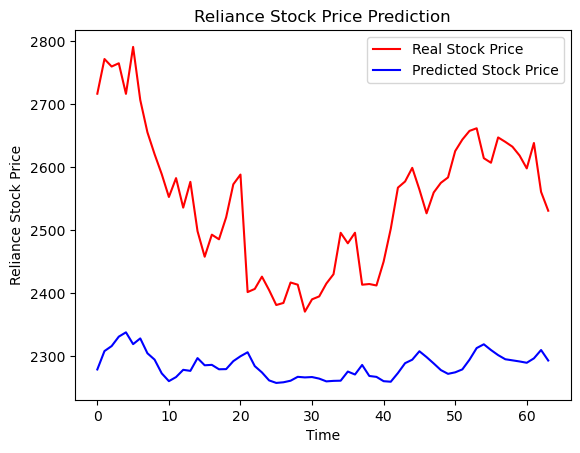

In [12]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [13]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

78115.70305376407

#### 3 hidden layers 

In [14]:
my_model3 = Sequential()

# add layers 

#layer 1
my_model3.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model3.add(Dropout(rate = 0.2))

#layer 2
my_model3.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model3.add(Dropout(rate = 0.2))

#layer 3
my_model3.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model3.add(Dropout(rate = 0.2))

#layer 4
my_model3.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model3.add(Dropout(rate = 0.2))

#output layer 
my_model3.add(Dense(units = 1))

## compile model 
my_model3.compile(optimizer = "adam", loss = "mean_squared_error")

In [15]:
my_model3.layers[0].set_weights(weights[0])
my_model3.layers[2].set_weights(weights[2])
my_model3.layers[4].set_weights(weights[4])
my_model3.layers[6].set_weights(weights[6])
my_model3.layers[8].set_weights(weights[20])

In [16]:
predicted_stock_price = my_model3.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 8ms/step


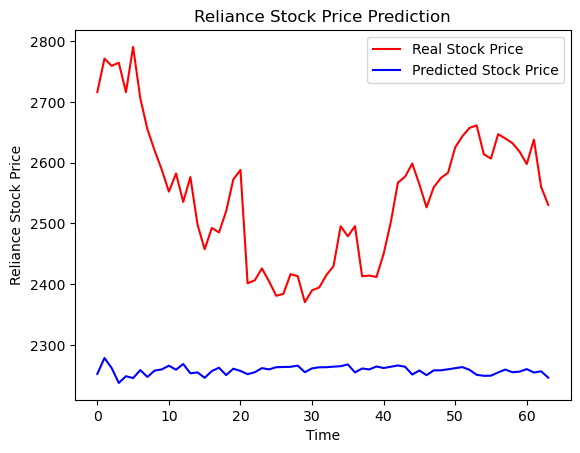

In [17]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [18]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

96441.48505720124

#### 4 hidden layers 

In [19]:
my_model4 = Sequential()

# add layers 

#layer 1
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 2
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 3
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 4
my_model4.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model4.add(Dropout(rate = 0.2))

#layer 5
my_model4.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model4.add(Dropout(rate = 0.2))

#output layer 
my_model4.add(Dense(units = 1))

## compile model 
my_model4.compile(optimizer = "adam", loss = "mean_squared_error")

In [20]:
my_model4.layers[0].set_weights(weights[0])
my_model4.layers[2].set_weights(weights[2])
my_model4.layers[4].set_weights(weights[4])
my_model4.layers[6].set_weights(weights[6])
my_model4.layers[8].set_weights(weights[8])
my_model4.layers[10].set_weights(weights[20])


In [21]:
predicted_stock_price = my_model4.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 8ms/step


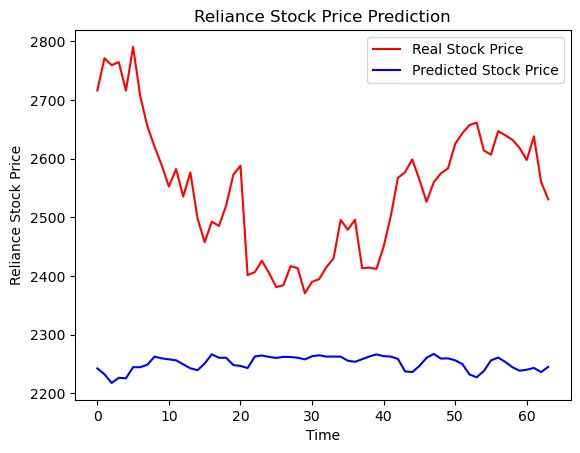

In [22]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [23]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

101827.12306817807

#### 6 hidden layers 

In [24]:
my_model6 = Sequential()

# add layers 

#layer 1
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 2
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 3
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 4
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 5
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 6
my_model6.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model6.add(Dropout(rate = 0.2))

#layer 7
my_model6.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model6.add(Dropout(rate = 0.2))

#output layer 
my_model6.add(Dense(units = 1))

## compile model 
my_model6.compile(optimizer = "adam", loss = "mean_squared_error")

In [25]:
my_model6.layers[0].set_weights(weights[0])
my_model6.layers[2].set_weights(weights[2])
my_model6.layers[4].set_weights(weights[4])
my_model6.layers[6].set_weights(weights[6])
my_model6.layers[8].set_weights(weights[8])
my_model6.layers[10].set_weights(weights[10])
my_model6.layers[12].set_weights(weights[12])
my_model6.layers[14].set_weights(weights[20])

In [26]:
predicted_stock_price = my_model6.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 1s 8ms/step


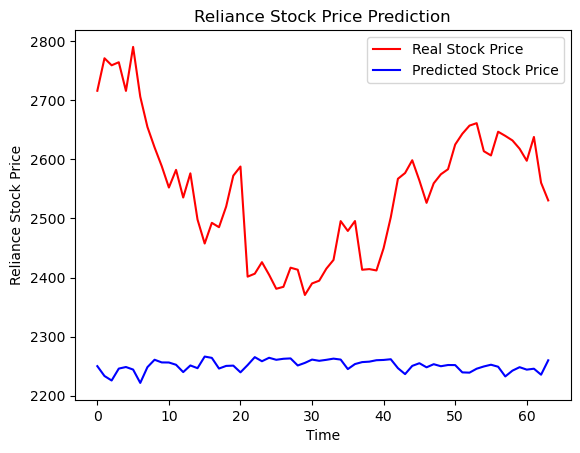

In [27]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [28]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

101844.70262827817

#### 8 hidden layers 

In [29]:
my_model8 = Sequential()

# add layers 

#layer 1
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 2
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 3
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 4
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 5
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 6
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 7
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 8
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 9
my_model8.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model8.add(Dropout(rate = 0.2))

#output layer 
my_model8.add(Dense(units = 1))

## compile model 
my_model8.compile(optimizer = "adam", loss = "mean_squared_error")

In [30]:
my_model8.layers[0].set_weights(weights[0])
my_model8.layers[2].set_weights(weights[2])
my_model8.layers[4].set_weights(weights[4])
my_model8.layers[6].set_weights(weights[6])
my_model8.layers[8].set_weights(weights[8])
my_model8.layers[10].set_weights(weights[10])
my_model8.layers[12].set_weights(weights[12])
my_model8.layers[14].set_weights(weights[14])
my_model8.layers[16].set_weights(weights[16])
my_model8.layers[18].set_weights(weights[20])

In [31]:
predicted_stock_price = my_model8.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 1s 8ms/step


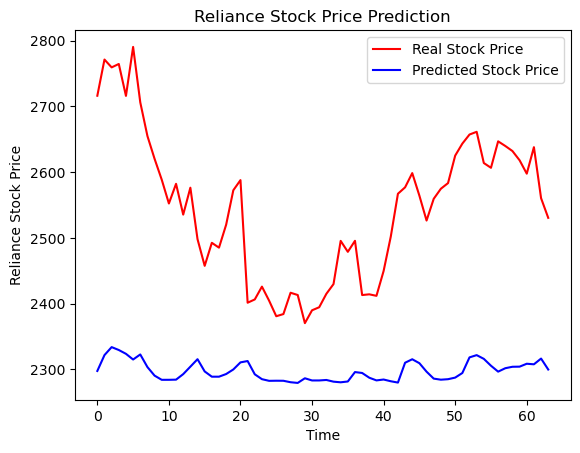

In [32]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [33]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price)).mean()
mse.append(MSE)
MSE

72708.06948258542

#### 9 hidden layers - All Layers 

#### initial layers

In [34]:
my_model9 = Sequential()

# add layers 

#layer 1
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 2
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 3
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 4
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 5
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 6
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 7
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 8
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 9
my_model9.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model9.add(Dropout(rate = 0.2))

#layer 10
my_model9.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model9.add(Dropout(rate = 0.2))

#output layer 
my_model9.add(Dense(units = 1))

## compile model 
my_model9.compile(optimizer = "adam", loss = "mean_squared_error")

In [35]:
my_model9.layers[0].set_weights(weights[0])
my_model9.layers[2].set_weights(weights[2])
my_model9.layers[4].set_weights(weights[4])
my_model9.layers[6].set_weights(weights[6])
my_model9.layers[8].set_weights(weights[8])
my_model9.layers[10].set_weights(weights[10])
my_model9.layers[12].set_weights(weights[12])
my_model9.layers[14].set_weights(weights[14])
my_model9.layers[16].set_weights(weights[16])
my_model9.layers[18].set_weights(weights[18])
my_model9.layers[20].set_weights(weights[20])

In [36]:
predicted_stock_price_final = my_model9.predict(x_test)
predicted_stock_price_final = scaler.inverse_transform(predicted_stock_price_final)
real_stock_price = df2.values

2/2 [==============================] - 1s 16ms/step


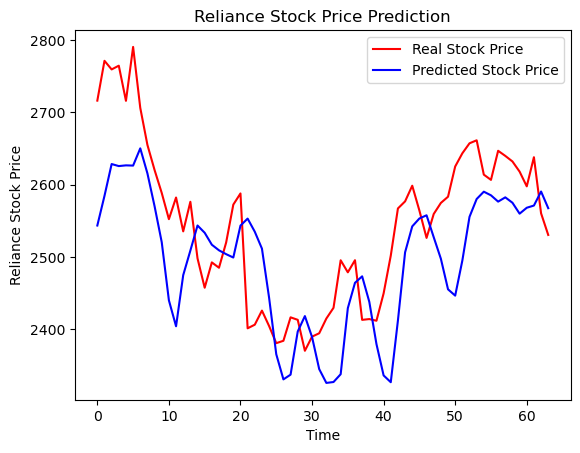

In [37]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price_final, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [38]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price_final)).mean()
mse.append(MSE)
MSE

8211.706248565577

#### Final Model

In [39]:
predicted_stock_price = my_model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 1s 16ms/step


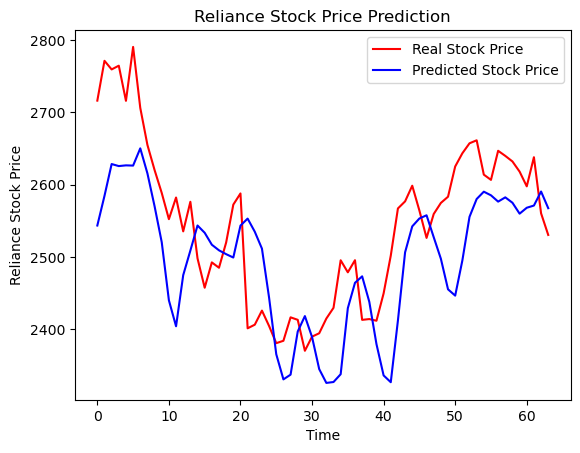

In [40]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

### Plot graph for accuracy for inreasing number of layers

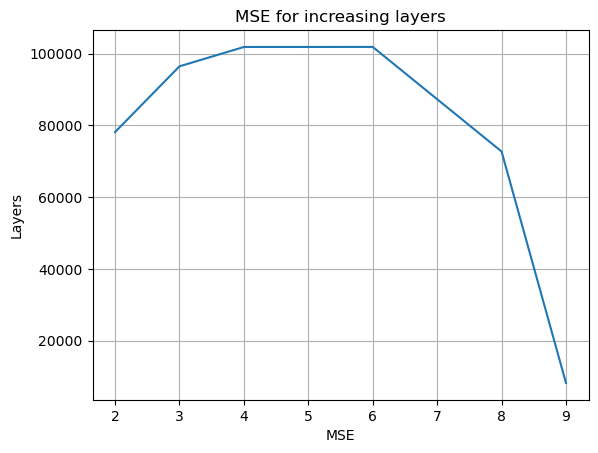

In [41]:
plt.plot([2, 3, 4, 6, 8, 9], mse)
plt.title('MSE for increasing layers')
plt.xlabel('MSE')
plt.ylabel('Layers')
plt.grid(True)
plt.show()

### Do layers with different modularities predict similar patterns? 

#### Taking 2nd layer 

In [42]:
predicted_stock_price2 = my_model2.predict(x_test)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price2)
real_stock_price2 = df2.values

2/2 [==============================] - 0s 8ms/step


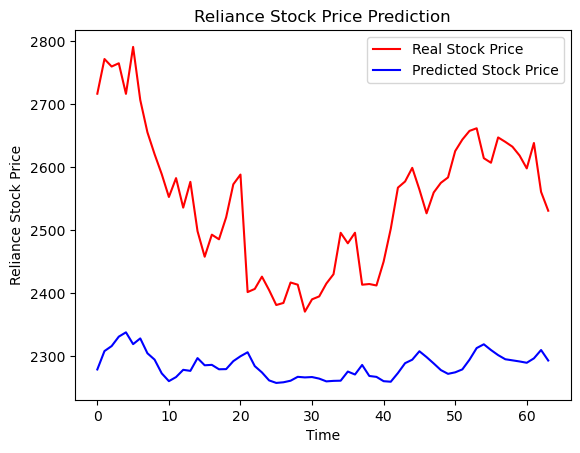

In [43]:
plt.plot(real_stock_price2, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price2, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [44]:
MSE = np.square(np.subtract(real_stock_price2, predicted_stock_price2)).mean()
MSE

78115.70305376407

#### Taking Layers 3 to 9

7 hidden layers

In [45]:
my_model8 = Sequential()

# add layers 

#layer 1
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 2
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 3
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 4
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 5
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 6
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 7
my_model8.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model8.add(Dropout(rate = 0.2))

#layer 8
my_model8.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model8.add(Dropout(rate = 0.2))

#output layer 
my_model8.add(Dense(units = 1))

## compile model 
my_model8.compile(optimizer = "adam", loss = "mean_squared_error")

In [46]:
my_model8.layers[0].set_weights(weights[0])
my_model8.layers[2].set_weights(weights[6])
my_model8.layers[4].set_weights(weights[8])
my_model8.layers[6].set_weights(weights[10])
my_model8.layers[8].set_weights(weights[12])
my_model8.layers[10].set_weights(weights[14])
my_model8.layers[12].set_weights(weights[16])
my_model8.layers[14].set_weights(weights[18])

In [47]:
predicted_stock_price7 = my_model8.predict(x_test)
predicted_stock_price7 = scaler.inverse_transform(predicted_stock_price7)
real_stock_price = df2.values

2/2 [==============================] - 1s 16ms/step


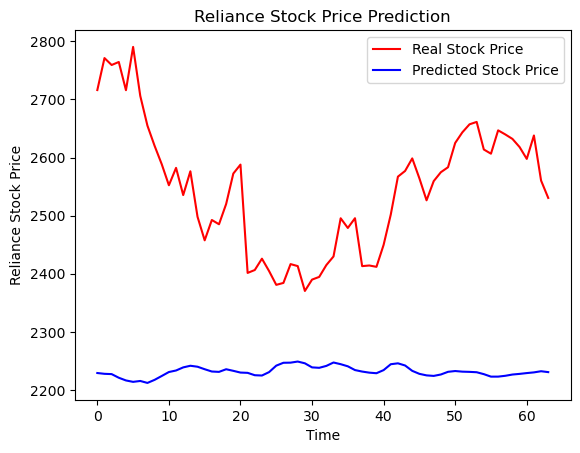

In [48]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price7, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()

In [49]:
MSE = np.square(np.subtract(real_stock_price, predicted_stock_price7)).mean()
MSE

113147.47547284048

Can we say first 2 layers are predicting major changes and the rest of the hidden layers are predicting minor changes

# Inference

they are giving a lower and an upper bound

## Confirming Inference

#### Lower bound

In [50]:
lb = predicted_stock_price2.tolist()

#### Upper Bound

In [51]:
ub = predicted_stock_price7.tolist()

#### Their sum should give us actual values 

In [52]:
data = np.array([lb, ub])
pred_avrg = np.average(data, axis = 0)

In [53]:
data = np.array([lb, ub])
pred_avrg = np.average(data, axis = 0)

# 2022 data 

In [54]:
my_model2 = Sequential()

# add layers 

#layer 1
my_model2.add(SimpleRNN(units = 100, return_sequences = True, activation = "relu", input_shape = (x_train_a.shape[1] ,1)))
my_model2.add(Dropout(rate = 0.2))

#layer 2
my_model2.add(SimpleRNN(units = 100, return_sequences = False, activation = "relu"))
my_model2.add(Dropout(rate = 0.2))

#output layer 
my_model2.add(Dense(units = 1))

## compile model 
my_model2.compile(optimizer = "adam", loss = "mean_squared_error")

In [55]:
my_model2.layers[0].set_weights(weights[0])
my_model2.layers[2].set_weights(weights[18])
my_model2.layers[4].set_weights(weights[20])

In [56]:
predicted_stock_price = my_model2.predict(x_test)
predicted_stock_price_9 = scaler.inverse_transform(predicted_stock_price)
real_stock_price = df2.values

2/2 [==============================] - 0s 8ms/step


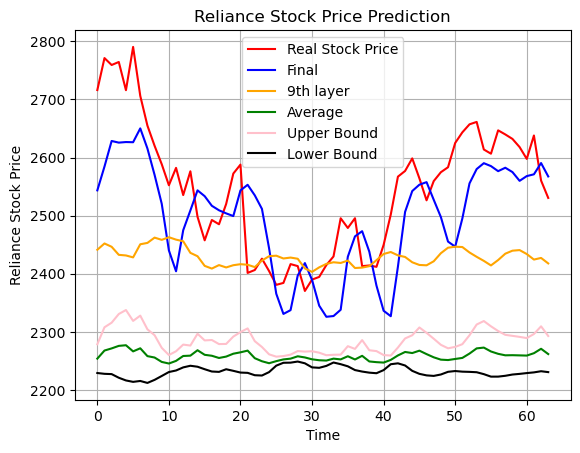

In [57]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price_final, color='blue', label='Final')
plt.plot(predicted_stock_price_9, color='Orange', label='9th layer')
plt.plot(pred_avrg, color='green', label='Average')
plt.plot(lb, color='pink', label='Upper Bound')
plt.plot(ub, color='black', label='Lower Bound')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.grid(True)
plt.legend()
plt.show()

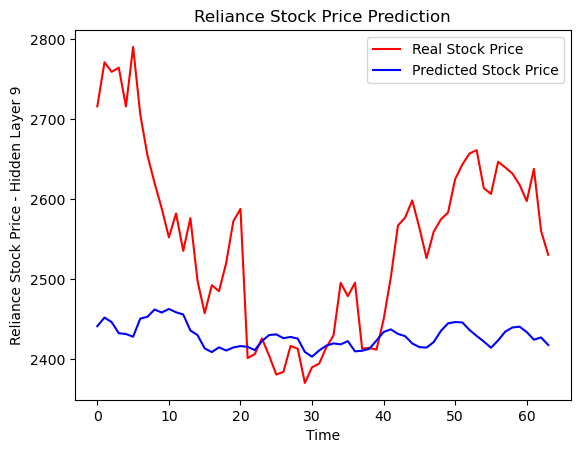

In [58]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price_9, color='blue', label='Predicted Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price - Hidden Layer 9')
plt.legend()
plt.show()

2/2 [==============================] - 0s 0s/step


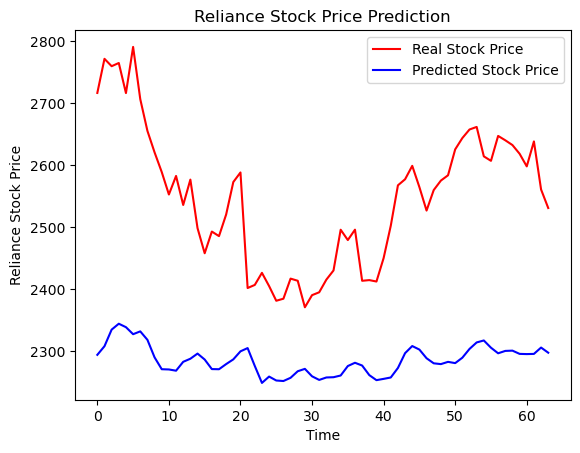

2/2 [==============================] - 0s 8ms/step


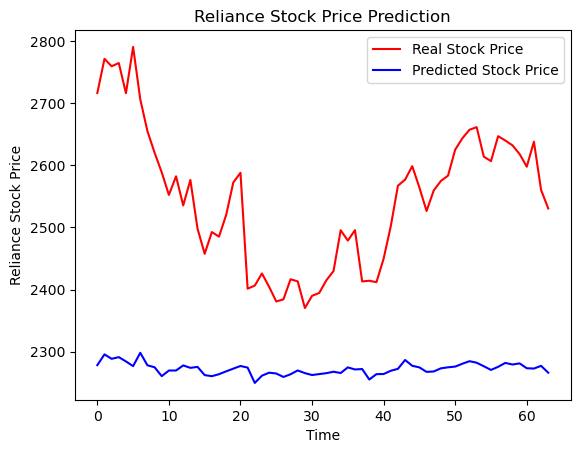

2/2 [==============================] - 0s 8ms/step


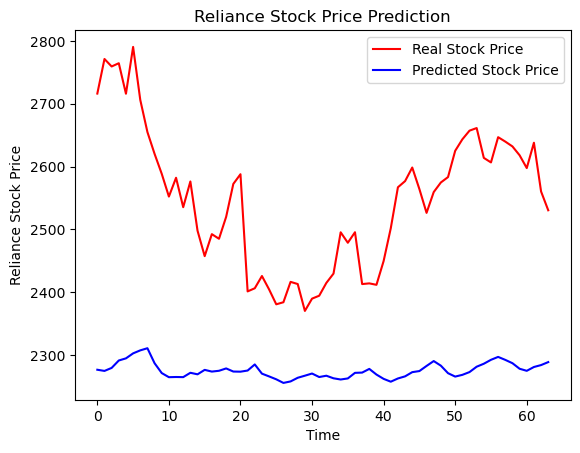

2/2 [==============================] - 0s 8ms/step


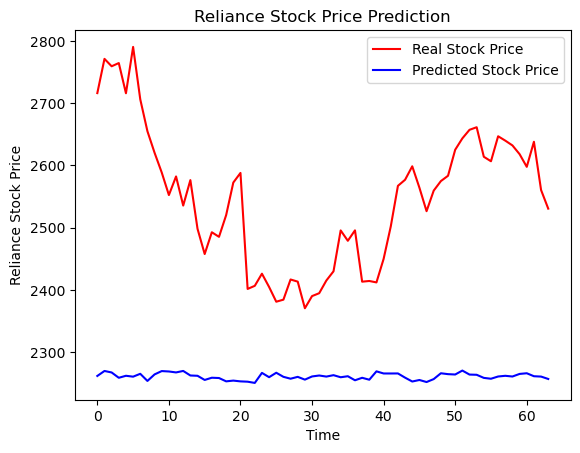

2/2 [==============================] - 0s 8ms/step


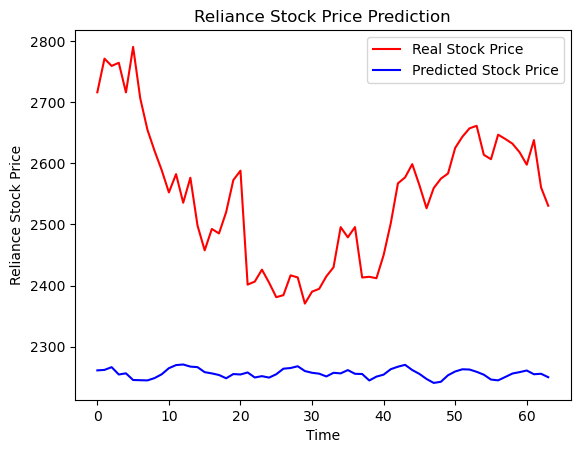

2/2 [==============================] - 0s 8ms/step


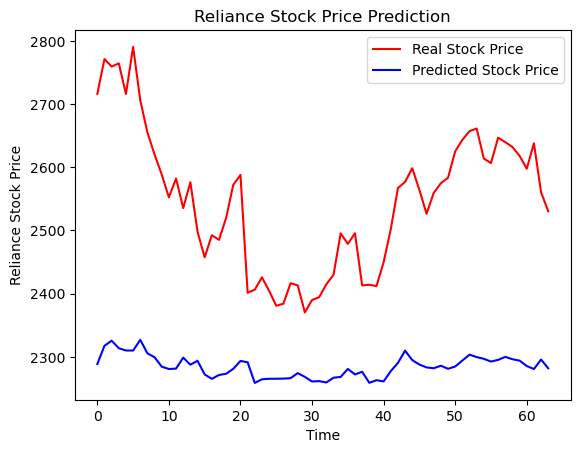

2/2 [==============================] - 0s 8ms/step


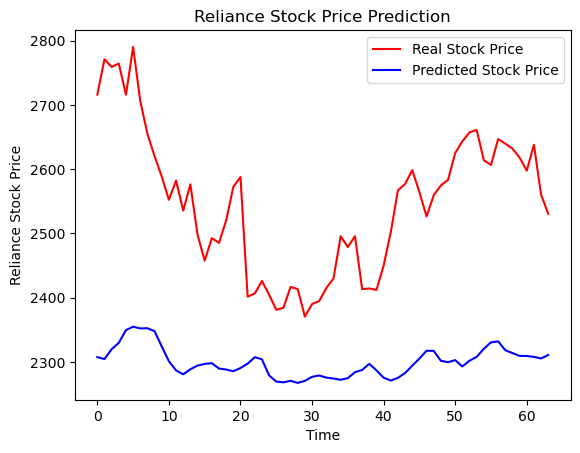

2/2 [==============================] - 0s 8ms/step


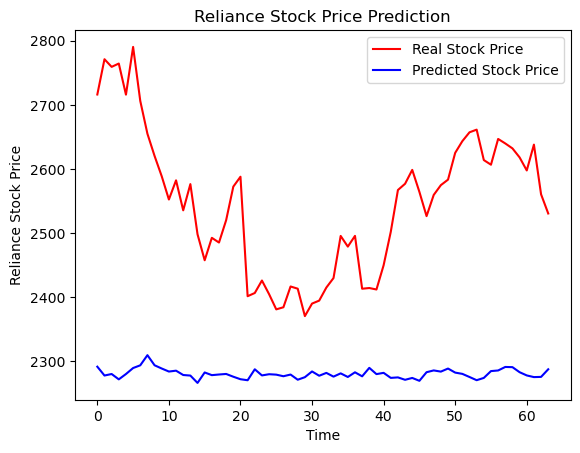

2/2 [==============================] - 0s 8ms/step


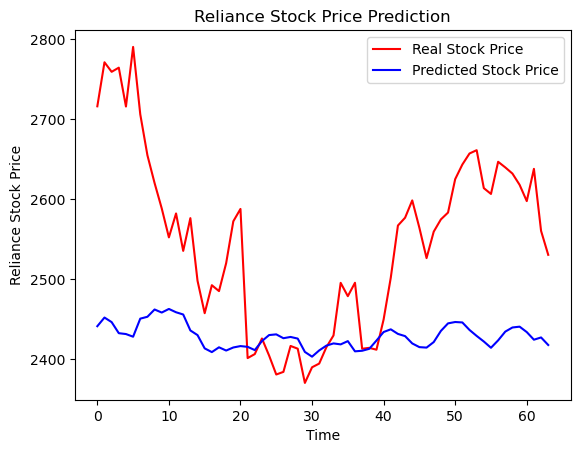

In [59]:
MSE_ind = []
for n in range(1, 10):
    m = 2*n 
    my_model2.layers[0].set_weights(weights[0])
    my_model2.layers[2].set_weights(weights[m])
    my_model2.layers[4].set_weights(weights[20])

    predicted_stock_price = my_model2.predict(x_test)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
    real_stock_price = df2.values

    plt.plot(real_stock_price, color='red', label='Real Stock Price')
    plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
    plt.title('Reliance Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Reliance Stock Price')
    plt.legend()
    plt.show() 

    
    MSE_ind.append(np.square(np.subtract(real_stock_price, predicted_stock_price)).mean())

In [60]:
MSE_ind

[77174.13475180138,
 86298.2978182463,
 84637.07542164437,
 94159.06542603765,
 97223.40225346945,
 78295.6515397653,
 70633.10551313218,
 83195.5102415029,
 24724.35015808139]

In [61]:
predicted_stock_price7 = my_model.predict(x_test)
predicted_stock_price_final = scaler.inverse_transform(predicted_stock_price7)
real_stock_price = df2.values
final_model_mse =  (np.square(np.subtract(real_stock_price, predicted_stock_price_final)).mean())

2/2 [==============================] - 0s 16ms/step


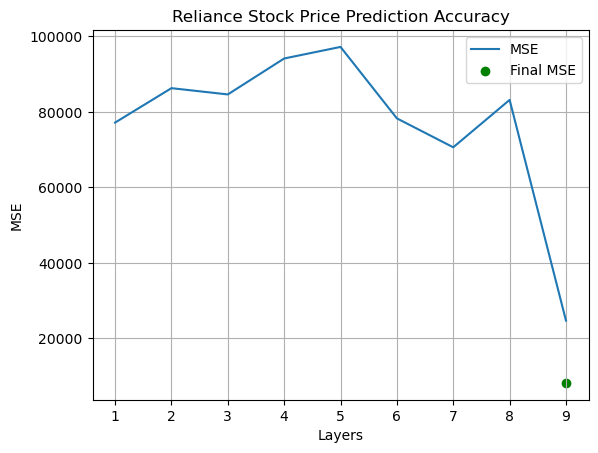

In [62]:
plt.plot(range(1, 10), MSE_ind,  label='MSE')
plt.scatter(9, final_model_mse, color = 'green', label = 'Final MSE')
plt.title('Reliance Stock Price Prediction Accuracy')
plt.xlabel('Layers')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show() 

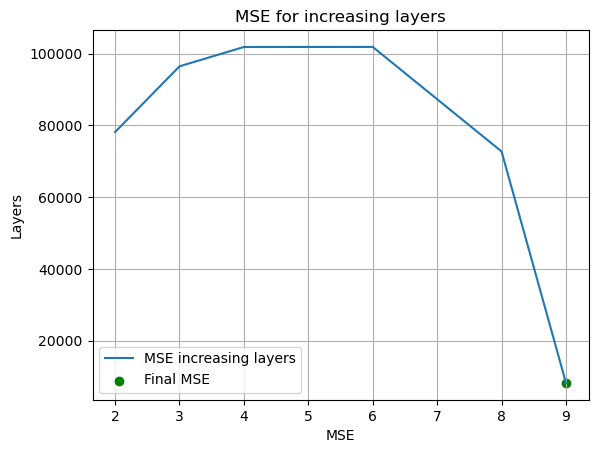

In [63]:
plt.plot([2, 3, 4, 6, 8, 9], mse, label = 'MSE increasing layers')
plt.title('MSE for increasing layers')
plt.scatter(9, final_model_mse, color = 'green', label = 'Final MSE')
plt.xlabel('MSE')
plt.ylabel('Layers')
plt.legend()
plt.grid(True)
plt.show()

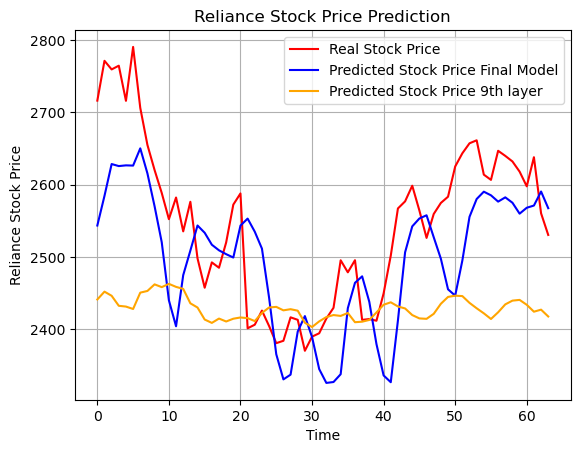

In [64]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price_final, color='blue', label='Predicted Stock Price Final Model')
plt.plot(predicted_stock_price_9, color='Orange', label='Predicted Stock Price 9th layer')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
final_model_mse =  (np.square(np.subtract(real_stock_price, predicted_stock_price_final)).mean())
model_mse_9 =  (np.square(np.subtract(real_stock_price, predicted_stock_price_9)).mean())

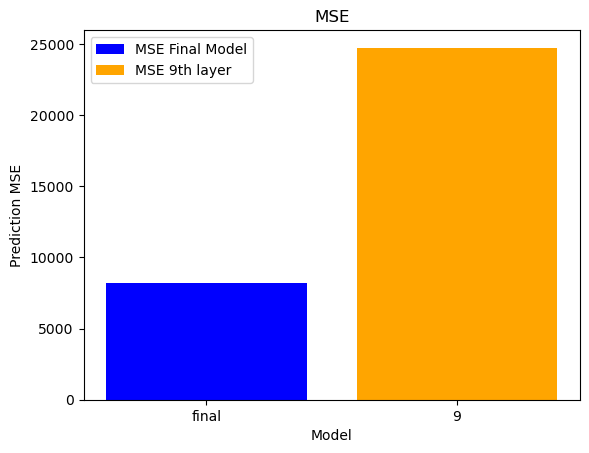

In [66]:
plt.bar('final', final_model_mse, color='Blue', label='MSE Final Model')
plt.bar('9', model_mse_9, color='Orange', label='MSE 9th layer')
plt.title('MSE')
plt.xlabel('Model')
plt.ylabel('Prediction MSE')

plt.legend()
plt.show()